In [110]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
from src.preprocessing import Preprocessor
from sklearn.model_selection import train_test_split
import pandas as pd
from catboost import CatBoostRegressor
import numpy as np

In [112]:
dataset = pd.read_csv("data/pf_suvs_i302_1s2025.csv")

In [113]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

In [114]:
preprocessor = Preprocessor(train)

In [115]:
train = preprocessor.preprocess(train)

In [116]:
val = preprocessor.preprocess(val)

In [117]:
x_train = train.drop(columns=["Precio"])
y_train = train["Precio"]

x_val = val.drop(columns=["Precio"])
y_val = val["Precio"]

In [121]:
cboost = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.1,
    depth=6,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

cboost.fit(
    x_train, y_train,
    eval_set=(x_val, y_val),
    use_best_model=True
)

0:	learn: 18980.3530925	test: 21210.9530740	best: 21210.9530740 (0)	total: 1.65ms	remaining: 3.29s
100:	learn: 6689.7727245	test: 7245.8922892	best: 7245.8922892 (100)	total: 164ms	remaining: 3.09s
200:	learn: 5721.7486967	test: 6148.2833176	best: 6148.2833176 (200)	total: 324ms	remaining: 2.9s
300:	learn: 5157.1969995	test: 5812.8579104	best: 5812.8579104 (300)	total: 480ms	remaining: 2.71s
400:	learn: 4744.3290507	test: 5628.9216778	best: 5628.9216778 (400)	total: 628ms	remaining: 2.5s
500:	learn: 4444.0624689	test: 5461.9592199	best: 5461.9592199 (500)	total: 785ms	remaining: 2.35s
600:	learn: 4241.8449104	test: 5408.3276236	best: 5408.3276236 (600)	total: 941ms	remaining: 2.19s
700:	learn: 4053.0557446	test: 5357.9926697	best: 5357.9926697 (700)	total: 1.09s	remaining: 2.03s
800:	learn: 3871.0588333	test: 5307.0060693	best: 5305.2236092 (791)	total: 1.27s	remaining: 1.9s
900:	learn: 3714.1451401	test: 5283.7423368	best: 5280.9291045 (870)	total: 1.43s	remaining: 1.74s
1000:	learn: 

In [122]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = cboost.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_val, y_pred)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")


Root Mean Squared Error: 5196.037554483751
R^2 Score: 0.9462159982109386
Mean Absolute Error: 2717.495585040098


In [120]:
iters = [50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
rmses = []
for i in iters:
    cboost = CatBoostRegressor(
        iterations=i,
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=42,
        verbose=100)

    cboost.fit(
        x_train, y_train,
        eval_set=(x_val, y_val),
        use_best_model=True
    )

    y_pred = cboost.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = mse ** 0.5
    rmses.append(rmse)
    print(f"Iterations: {i}, RMSE: {rmse}")

0:	learn: 18980.3530925	test: 21210.9530740	best: 21210.9530740 (0)	total: 2.09ms	remaining: 103ms
49:	learn: 7764.9738638	test: 8842.6584894	best: 8842.6584894 (49)	total: 112ms	remaining: 0us

bestTest = 8842.658489
bestIteration = 49

Iterations: 50, RMSE: 8842.658496668875
0:	learn: 18980.3530925	test: 21210.9530740	best: 21210.9530740 (0)	total: 2.47ms	remaining: 244ms
99:	learn: 6706.0709268	test: 7265.0131240	best: 7265.0131240 (99)	total: 227ms	remaining: 0us

bestTest = 7265.013124
bestIteration = 99

Iterations: 100, RMSE: 7265.0131291566295
0:	learn: 18980.3530925	test: 21210.9530740	best: 21210.9530740 (0)	total: 2.31ms	remaining: 461ms
100:	learn: 6689.7727245	test: 7245.8922892	best: 7245.8922892 (100)	total: 223ms	remaining: 219ms
199:	learn: 5728.4380694	test: 6149.6167001	best: 6149.6167001 (199)	total: 463ms	remaining: 0us

bestTest = 6149.6167
bestIteration = 199

Iterations: 200, RMSE: 6149.616705292191
0:	learn: 18980.3530925	test: 21210.9530740	best: 21210.9530740

KeyboardInterrupt: 

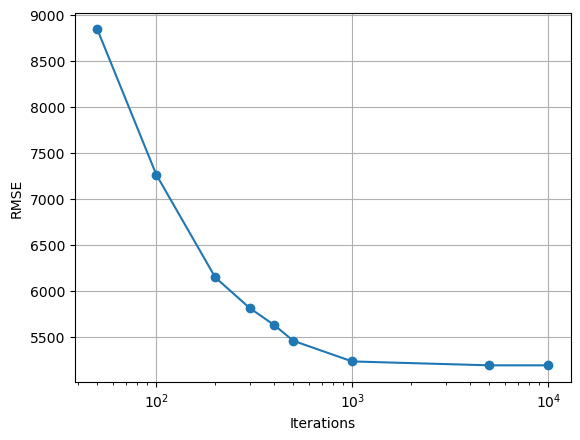

In [ ]:
import matplotlib.pyplot as plt

plt.plot(iters, rmses, marker='o')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.xscale('log')
plt.grid(True)
plt.show()